# `PROJECT REPORT FOR GROUP_9`
CARTPOLE BALANCING BALANCING

BY

`THOMPSON OKOKA`


1)	***`Project Overview`***

The CartPole Balancing project aims to implement and compare multiple Reinforcement Learning (RL) algorithms—Q-Learning, Deep Q-Learning (DQN), and Double DQN (DDQN)—to solve the CartPole problem using OpenAI Gym. The project involves hyperparameter tuning, performance evaluation, and visualization of results to gain insights into the effectiveness of each algorithm.

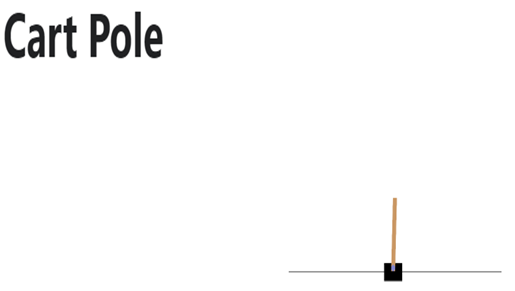
 
2)	***`Objectives`***
1.	Implement and compare Q-Learning, DQN, and DDQN algorithms.
2.	Perform hyperparameter tuning using Grid Search or Random Search.
3.	Evaluate and compare the performance of each algorithm.
4.	Visualize the results with detailed plots and metrics.
5.	Document the findings and provide insights into the effectiveness of each algorithm.

***`Observation Space`***
The observation is a ndarray with shape (4,) with the values corresponding to the following positions and velocities:
Num	Observation	Min	Max
0	Cart Position	-4.8	4.8
1	Cart Velocity	-Inf	Inf
2	Pole Angle	~ -0.418 rad (-24°)	~ 0.418 rad (24°)
3	Pole Angular Velocity	-Inf	Inf

3)	 ***`Introduction To Cartpole Problem`***

The CartPole balancing problem is a classic control challenge where the objective is to keep a pole balanced upright on a cart by applying forces to the left or right. The problem serves as a benchmark for evaluating the performance of various reinforcement learning algorithms. This report examines and compares the performance of three algorithms—Q-Learning (QN), Deep Q-Network (DQN), and Double Deep Q-Network (DDQN)—in solving the CartPole balancing problem. The algorithms were implemented and tuned using different hyperparameters, and their performances were evaluated based on the rewards, cumulative rewards, and running average rewards over multiple episodes.


### `Code for Q-Learning, DQN, and DDQN (100 Episodes)`

Training Q-Learning Agent...
Episode 1/100, Reward: 15.0, Cumulative Reward: 15.0, Running Avg: 15.0
Episode 2/100, Reward: 31.0, Cumulative Reward: 46.0, Running Avg: 23.0
Episode 3/100, Reward: 58.0, Cumulative Reward: 104.0, Running Avg: 34.666666666666664
Episode 4/100, Reward: 18.0, Cumulative Reward: 122.0, Running Avg: 30.5
Episode 5/100, Reward: 15.0, Cumulative Reward: 137.0, Running Avg: 27.4
Episode 6/100, Reward: 11.0, Cumulative Reward: 148.0, Running Avg: 24.666666666666668
Episode 7/100, Reward: 16.0, Cumulative Reward: 164.0, Running Avg: 23.428571428571427
Episode 8/100, Reward: 27.0, Cumulative Reward: 191.0, Running Avg: 23.875
Episode 9/100, Reward: 19.0, Cumulative Reward: 210.0, Running Avg: 23.333333333333332
Episode 10/100, Reward: 10.0, Cumulative Reward: 220.0, Running Avg: 22.0
Episode 11/100, Reward: 28.0, Cumulative Reward: 248.0, Running Avg: 23.3
Episode 12/100, Reward: 42.0, Cumulative Reward: 290.0, Running Avg: 24.4
Episode 13/100, Reward: 53.0, Cumula

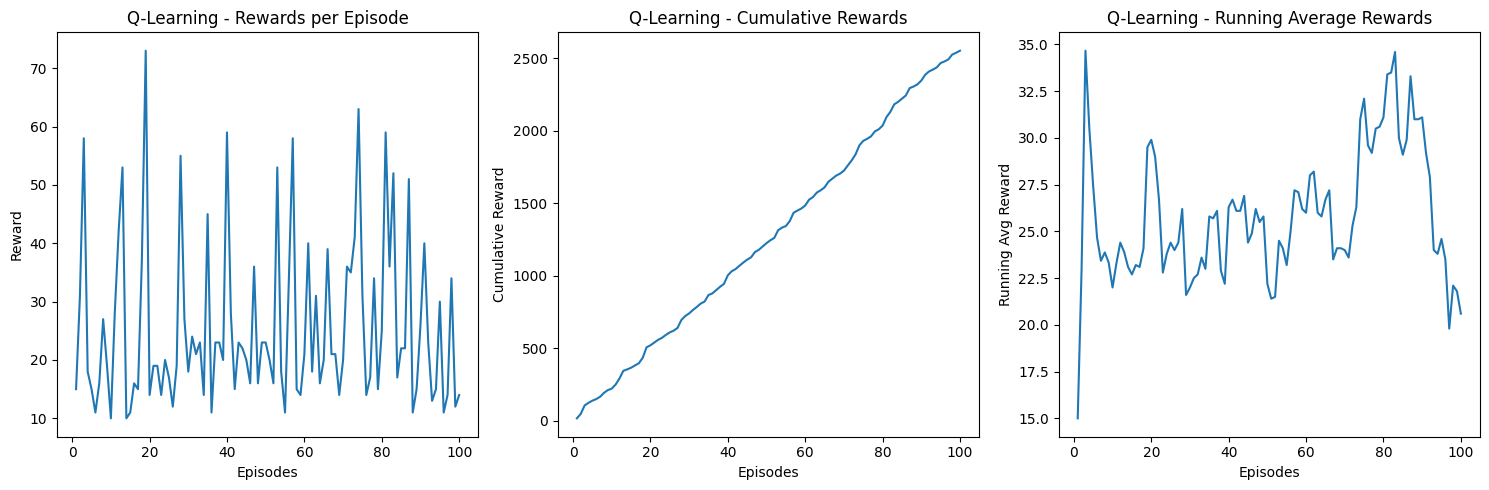

Training DQN Agent...
Episode 1/100, Reward: 14.0, Cumulative Reward: 14.0, Running Avg: 14.0
Episode 2/100, Reward: 14.0, Cumulative Reward: 28.0, Running Avg: 14.0
Episode 3/100, Reward: 13.0, Cumulative Reward: 41.0, Running Avg: 13.666666666666666
Episode 4/100, Reward: 16.0, Cumulative Reward: 57.0, Running Avg: 14.25
Episode 5/100, Reward: 25.0, Cumulative Reward: 82.0, Running Avg: 16.4
Episode 6/100, Reward: 13.0, Cumulative Reward: 95.0, Running Avg: 15.833333333333334
Episode 7/100, Reward: 16.0, Cumulative Reward: 111.0, Running Avg: 15.857142857142858
Episode 8/100, Reward: 9.0, Cumulative Reward: 120.0, Running Avg: 15.0
Episode 9/100, Reward: 11.0, Cumulative Reward: 131.0, Running Avg: 14.555555555555555
Episode 10/100, Reward: 11.0, Cumulative Reward: 142.0, Running Avg: 14.2
Episode 11/100, Reward: 11.0, Cumulative Reward: 153.0, Running Avg: 13.9
Episode 12/100, Reward: 11.0, Cumulative Reward: 164.0, Running Avg: 13.6
Episode 13/100, Reward: 15.0, Cumulative Reward: 

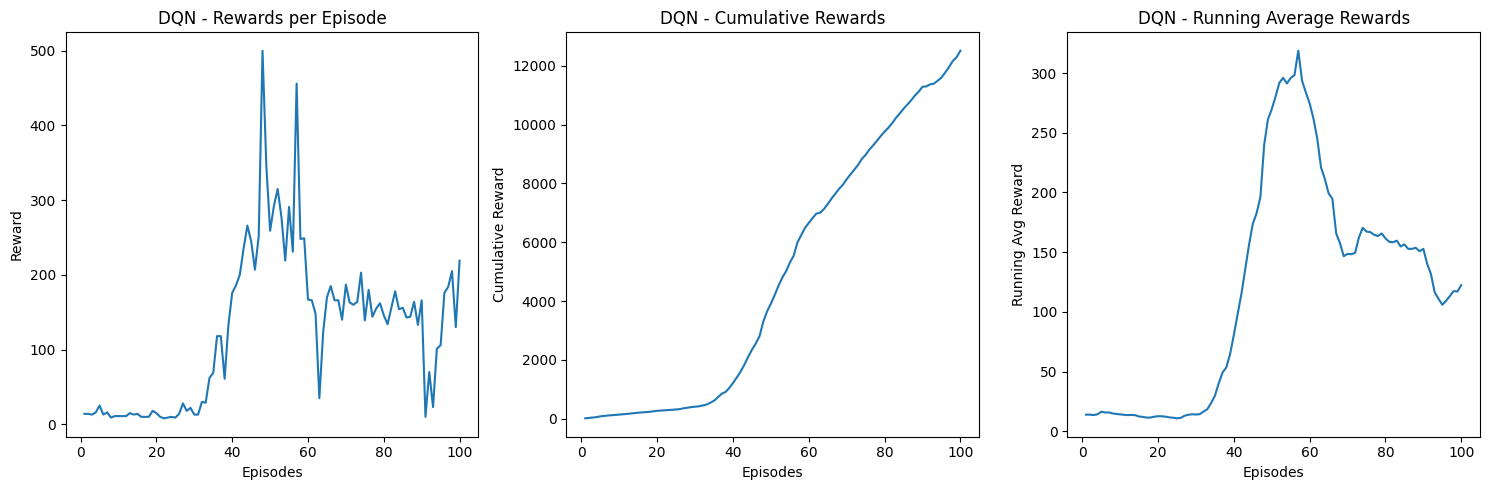

Training DDQN Agent...
Episode 1/100, Reward: 16.0, Cumulative Reward: 16.0, Running Avg: 16.0
Episode 2/100, Reward: 11.0, Cumulative Reward: 27.0, Running Avg: 13.5
Episode 3/100, Reward: 12.0, Cumulative Reward: 39.0, Running Avg: 13.0
Episode 4/100, Reward: 14.0, Cumulative Reward: 53.0, Running Avg: 13.25
Episode 5/100, Reward: 10.0, Cumulative Reward: 63.0, Running Avg: 12.6
Episode 6/100, Reward: 52.0, Cumulative Reward: 115.0, Running Avg: 19.166666666666668
Episode 7/100, Reward: 139.0, Cumulative Reward: 254.0, Running Avg: 36.285714285714285
Episode 8/100, Reward: 59.0, Cumulative Reward: 313.0, Running Avg: 39.125
Episode 9/100, Reward: 28.0, Cumulative Reward: 341.0, Running Avg: 37.888888888888886
Episode 10/100, Reward: 31.0, Cumulative Reward: 372.0, Running Avg: 37.2
Episode 11/100, Reward: 42.0, Cumulative Reward: 414.0, Running Avg: 39.8
Episode 12/100, Reward: 38.0, Cumulative Reward: 452.0, Running Avg: 42.5
Episode 13/100, Reward: 63.0, Cumulative Reward: 515.0, R

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import tensorflow as tf
from tensorflow import keras
import random

# Q-Learning Agent
class QLearningAgent:
    def __init__(self, state_size, action_size, alpha, gamma, epsilon, epsilon_decay):
        self.state_size = state_size
        self.action_size = action_size
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = 0.01
        self.q_table = np.zeros(self.state_size + (self.action_size,))
    
    def act(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.action_size - 1)
        return np.argmax(self.q_table[state])
    
    def learn(self, state, action, reward, next_state, done):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state + (best_next_action,)] * (not done)
        td_error = td_target - self.q_table[state + (action,)]
        self.q_table[state + (action,)] += self.alpha * td_error
        
        if done:
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

# DQN and DDQN base class
class DQNBaseAgent:
    def __init__(self, state_size, action_size, learning_rate, gamma, epsilon_decay):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = gamma
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = epsilon_decay
        self.learning_rate = learning_rate
        self.model = self._build_model()

    def _build_model(self):
        model = keras.Sequential([
            keras.layers.Dense(24, input_shape=(self.state_size,), activation='relu'),
            keras.layers.Dense(24, activation='relu'),
            keras.layers.Dense(self.action_size, activation='linear')
        ])
        model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        states = np.array([experience[0] for experience in minibatch]).reshape(batch_size, self.state_size)
        next_states = np.array([experience[3] for experience in minibatch]).reshape(batch_size, self.state_size)
        targets = self.model.predict(states, verbose=0)

        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state.reshape(1, self.state_size), verbose=0)[0])
            targets[i][action] = target

        self.model.fit(states, targets, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# DQN Agent
class DQNAgent(DQNBaseAgent):
    pass

# DDQN Agent
class DDQNAgent(DQNBaseAgent):
    def __init__(self, state_size, action_size, learning_rate, gamma, epsilon_decay):
        super().__init__(state_size, action_size, learning_rate, gamma, epsilon_decay)
        self.target_model = self._build_model()
        self.update_target_model()

    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        states = np.array([experience[0] for experience in minibatch]).reshape(batch_size, self.state_size)
        next_states = np.array([experience[3] for experience in minibatch]).reshape(batch_size, self.state_size)
        targets = self.model.predict(states, verbose=0)

        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            target = reward
            if not done:
                t = self.target_model.predict(next_state, verbose=0)
                a = np.argmax(self.model.predict(next_state, verbose=0)[0])
                target = reward + self.gamma * t[0][a]
            targets[i][action] = target

        self.model.fit(states, targets, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        self.update_target_model()

# Helper functions
def discretize_state(state, bins):
    return tuple(np.digitize(state[i], bins[i]) for i in range(len(state)))

def run_episode(env, agent, bins=None, batch_size=32, training=True):
    state = env.reset()[0]
    if bins:
        state = discretize_state(state, bins)
    else:
        state = np.reshape(state, [1, agent.state_size])
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, truncated, _ = env.step(action)
        done = done or truncated
        total_reward += reward
        
        if bins:
            next_state_discrete = discretize_state(next_state, bins)
            agent.learn(state, action, reward, next_state_discrete, done)
            state = next_state_discrete
        else:
            next_state = np.reshape(next_state, [1, agent.state_size])
            if training:
                agent.remember(state, action, reward, next_state, done)
                if len(agent.memory) > batch_size:
                    agent.replay(batch_size)
            state = next_state

    return total_reward

def train_agent(env, agent, episodes=100, bins=None, batch_size=32):
    rewards = []
    cumulative_rewards = []
    running_avg_rewards = []
    cumulative_reward = 0
    
    for episode in range(episodes):
        reward = run_episode(env, agent, bins, batch_size)
        rewards.append(reward)
        cumulative_reward += reward
        cumulative_rewards.append(cumulative_reward)
        running_avg_rewards.append(np.mean(rewards[-10:]))  # Running average of last 10 episodes
        
        print(f"Episode {episode+1}/{episodes}, Reward: {reward}, Cumulative Reward: {cumulative_reward}, Running Avg: {running_avg_rewards[-1]}")
    
    return rewards, cumulative_rewards, running_avg_rewards

def plot_metrics(algorithm_name, rewards, cumulative_rewards, running_avg_rewards):
    episodes = range(1, len(rewards) + 1)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(episodes, rewards)
    plt.title(f'{algorithm_name} - Rewards per Episode')
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    
    plt.subplot(1, 3, 2)
    plt.plot(episodes, cumulative_rewards)
    plt.title(f'{algorithm_name} - Cumulative Rewards')
    plt.xlabel('Episodes')
    plt.ylabel('Cumulative Reward')
    
    plt.subplot(1, 3, 3)
    plt.plot(episodes, running_avg_rewards)
    plt.title(f'{algorithm_name} - Running Average Rewards')
    plt.xlabel('Episodes')
    plt.ylabel('Running Avg Reward')
    
    plt.tight_layout()
    plt.show()

# Main execution
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Q-Learning
print("Training Q-Learning Agent...")
q_learning_bins = [
    np.linspace(-4.8, 4.8, 10),
    np.linspace(-4, 4, 10),
    np.linspace(-0.418, 0.418, 10),
    np.linspace(-4, 4, 10)
]
q_learning_agent = QLearningAgent(state_size=(10, 10, 10, 10), action_size=action_size, alpha=0.3, gamma=0.99, epsilon=1.0, epsilon_decay=0.995)
q_learning_rewards, q_learning_cum_rewards, q_learning_running_avg = train_agent(env, q_learning_agent, episodes=100, bins=q_learning_bins)
plot_metrics("Q-Learning", q_learning_rewards, q_learning_cum_rewards, q_learning_running_avg)

# DQN
print("Training DQN Agent...")
dqn_agent = DQNAgent(state_size=state_size, action_size=action_size, learning_rate=0.00198, gamma=0.9364, epsilon_decay=0.995)
dqn_rewards, dqn_cum_rewards, dqn_running_avg = train_agent(env, dqn_agent, episodes=100)
plot_metrics("DQN", dqn_rewards, dqn_cum_rewards, dqn_running_avg)

# DDQN
print("Training DDQN Agent...")
ddqn_agent = DDQNAgent(state_size=state_size, action_size=action_size, learning_rate=0.00979, gamma=0.9406, epsilon_decay=0.992)
ddqn_rewards, ddqn_cum_rewards, ddqn_running_avg = train_agent(env, ddqn_agent, episodes=100)
plot_metrics("DDQN", ddqn_rewards, ddqn_cum_rewards, ddqn_running_avg)


### `Code DDQN (100 Episodes)`

Training DDQN Agent...


c:\Users\DELL\Documents\Class\Second Semester\CSCN8020-24S-Sec2-Reinforcement\Project\myenv2\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\DELL\Documents\Class\Second Semester\CSCN8020-24S-Sec2-Reinforcement\Project\myenv2\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1/100, Reward: 13.0, Cumulative Reward: 13.0, Running Avg: 13.0
Episode 2/100, Reward: 29.0, Cumulative Reward: 42.0, Running Avg: 21.0
Episode 3/100, Reward: 23.0, Cumulative Reward: 65.0, Running Avg: 21.666666666666668
Episode 4/100, Reward: 10.0, Cumulative Reward: 75.0, Running Avg: 18.75
Episode 5/100, Reward: 17.0, Cumulative Reward: 92.0, Running Avg: 18.4
Episode 6/100, Reward: 10.0, Cumulative Reward: 102.0, Running Avg: 17.0
Episode 7/100, Reward: 11.0, Cumulative Reward: 113.0, Running Avg: 16.142857142857142
Episode 8/100, Reward: 10.0, Cumulative Reward: 123.0, Running Avg: 15.375
Episode 9/100, Reward: 9.0, Cumulative Reward: 132.0, Running Avg: 14.666666666666666
Episode 10/100, Reward: 10.0, Cumulative Reward: 142.0, Running Avg: 14.2
Episode 11/100, Reward: 10.0, Cumulative Reward: 152.0, Running Avg: 13.9
Episode 12/100, Reward: 10.0, Cumulative Reward: 162.0, Running Avg: 12.0
Episode 13/100, Reward: 10.0, Cumulative Reward: 172.0, Running Avg: 10.7
Episode 

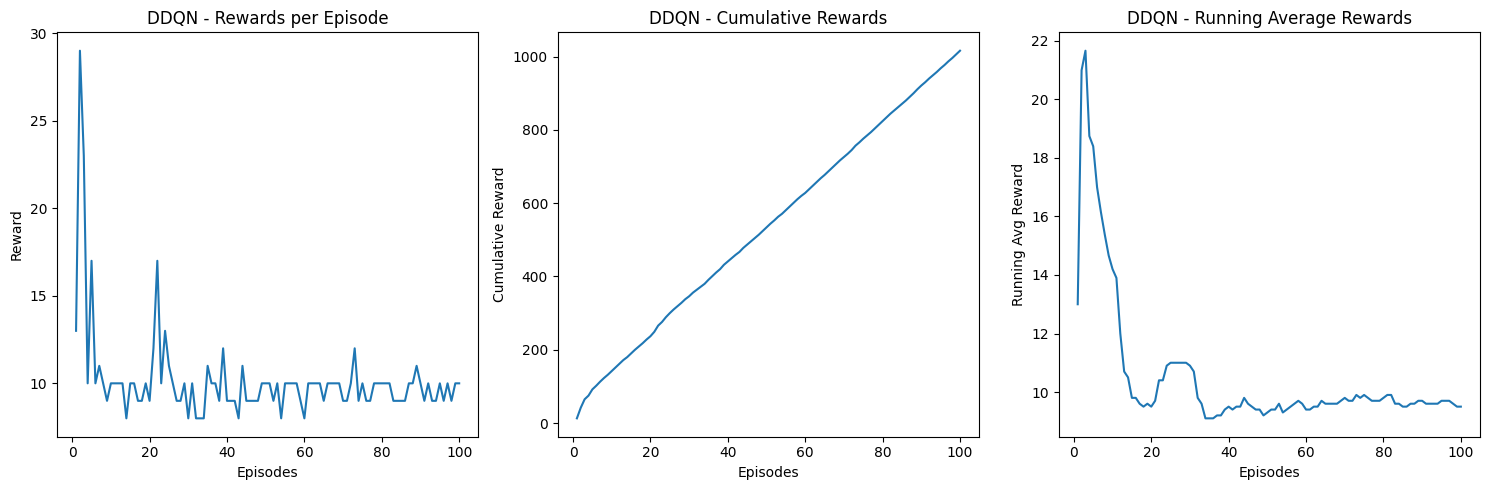

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import tensorflow as tf
from tensorflow import keras
import random

# DDQN Agent
class DDQNAgent:
    def __init__(self, state_size, action_size, learning_rate, gamma, epsilon_decay):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = gamma
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = epsilon_decay
        self.learning_rate = learning_rate
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        model = keras.Sequential([
            keras.layers.Dense(24, input_shape=(self.state_size,), activation='relu'),
            keras.layers.Dense(24, activation='relu'),
            keras.layers.Dense(self.action_size, activation='linear')
        ])
        model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate))
        return model

    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        states = np.array([experience[0] for experience in minibatch]).reshape(batch_size, self.state_size)
        next_states = np.array([experience[3] for experience in minibatch]).reshape(batch_size, self.state_size)
        targets = self.model.predict(states, verbose=0)

        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            target = reward
            if not done:
                t = self.target_model.predict(next_state, verbose=0)
                a = np.argmax(self.model.predict(next_state, verbose=0)[0])
                target = reward + self.gamma * t[0][a]
            targets[i][action] = target

        self.model.fit(states, targets, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        self.update_target_model()

def run_episode(env, agent, batch_size=32):
    state = env.reset()[0]
    state = np.reshape(state, [1, agent.state_size])
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, truncated, _ = env.step(action)
        done = done or truncated
        total_reward += reward
        
        next_state = np.reshape(next_state, [1, agent.state_size])
        agent.remember(state, action, reward, next_state, done)
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)
        state = next_state

    return total_reward

def train_agent(env, agent, episodes=100, batch_size=32):
    rewards = []
    cumulative_rewards = []
    running_avg_rewards = []
    cumulative_reward = 0
    
    for episode in range(episodes):
        reward = run_episode(env, agent, batch_size)
        rewards.append(reward)
        cumulative_reward += reward
        cumulative_rewards.append(cumulative_reward)
        running_avg_rewards.append(np.mean(rewards[-10:]))  # Running average of last 10 episodes
        
        print(f"Episode {episode+1}/{episodes}, Reward: {reward}, Cumulative Reward: {cumulative_reward}, Running Avg: {running_avg_rewards[-1]}")
    
    return rewards, cumulative_rewards, running_avg_rewards

def plot_metrics(algorithm_name, rewards, cumulative_rewards, running_avg_rewards):
    episodes = range(1, len(rewards) + 1)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(episodes, rewards)
    plt.title(f'{algorithm_name} - Rewards per Episode')
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    
    plt.subplot(1, 3, 2)
    plt.plot(episodes, cumulative_rewards)
    plt.title(f'{algorithm_name} - Cumulative Rewards')
    plt.xlabel('Episodes')
    plt.ylabel('Cumulative Reward')
    
    plt.subplot(1, 3, 3)
    plt.plot(episodes, running_avg_rewards)
    plt.title(f'{algorithm_name} - Running Average Rewards')
    plt.xlabel('Episodes')
    plt.ylabel('Running Avg Reward')
    
    plt.tight_layout()
    plt.show()

# Main execution for DDQN
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

print("Training DDQN Agent...")
ddqn_agent = DDQNAgent(state_size=state_size, action_size=action_size, learning_rate=0.00979, gamma=0.9406, epsilon_decay=0.992)
ddqn_rewards, ddqn_cum_rewards, ddqn_running_avg = train_agent(env, ddqn_agent, episodes=100)
plot_metrics("DDQN", ddqn_rewards, ddqn_cum_rewards, ddqn_running_avg)


### `Hyperparameter Tuning Code for Q-Learning, DQN, and DDQN (20 Episodes)`

Training Q-Learning Agent...
Episode 1/50, Reward: 30.0, Cumulative Reward: 30.0, Running Avg: 30.0
Episode 2/50, Reward: 32.0, Cumulative Reward: 62.0, Running Avg: 31.0
Episode 3/50, Reward: 57.0, Cumulative Reward: 119.0, Running Avg: 39.666666666666664
Episode 4/50, Reward: 48.0, Cumulative Reward: 167.0, Running Avg: 41.75
Episode 5/50, Reward: 13.0, Cumulative Reward: 180.0, Running Avg: 36.0
Episode 6/50, Reward: 19.0, Cumulative Reward: 199.0, Running Avg: 33.166666666666664
Episode 7/50, Reward: 26.0, Cumulative Reward: 225.0, Running Avg: 32.142857142857146
Episode 8/50, Reward: 17.0, Cumulative Reward: 242.0, Running Avg: 30.25
Episode 9/50, Reward: 9.0, Cumulative Reward: 251.0, Running Avg: 27.88888888888889
Episode 10/50, Reward: 35.0, Cumulative Reward: 286.0, Running Avg: 28.6
Episode 11/50, Reward: 11.0, Cumulative Reward: 297.0, Running Avg: 26.7
Episode 12/50, Reward: 16.0, Cumulative Reward: 313.0, Running Avg: 25.1
Episode 13/50, Reward: 9.0, Cumulative Reward: 322

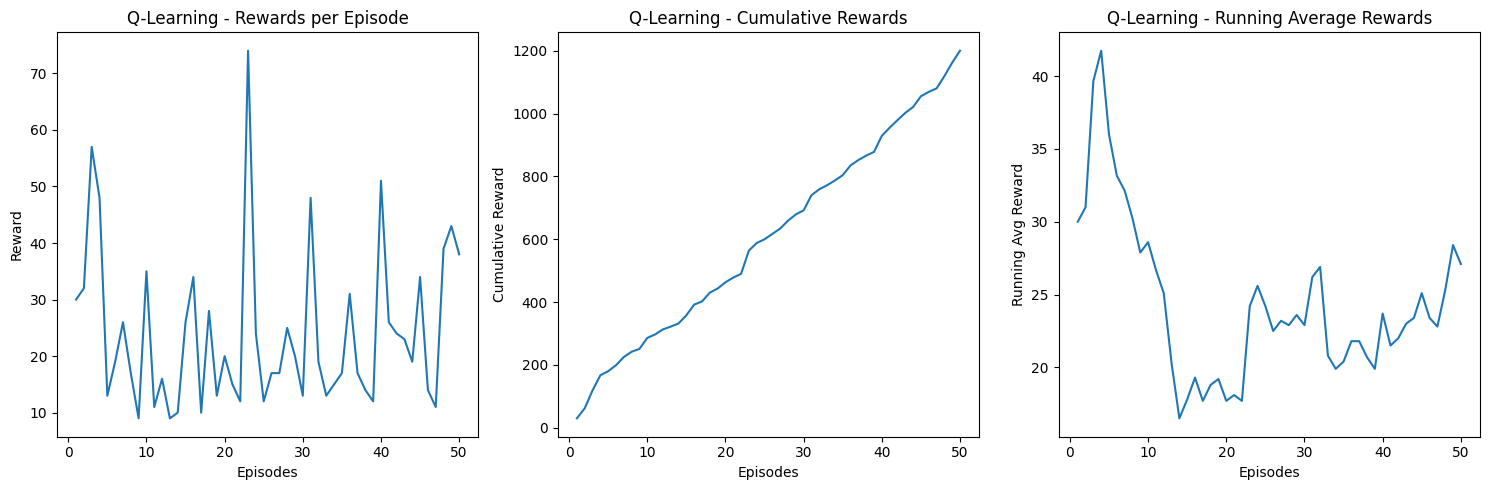

Training DQN Agent...
Episode 1/50, Reward: 42.0, Cumulative Reward: 42.0, Running Avg: 42.0
Episode 2/50, Reward: 41.0, Cumulative Reward: 83.0, Running Avg: 41.5
Episode 3/50, Reward: 27.0, Cumulative Reward: 110.0, Running Avg: 36.666666666666664
Episode 4/50, Reward: 10.0, Cumulative Reward: 120.0, Running Avg: 30.0
Episode 5/50, Reward: 9.0, Cumulative Reward: 129.0, Running Avg: 25.8
Episode 6/50, Reward: 10.0, Cumulative Reward: 139.0, Running Avg: 23.166666666666668
Episode 7/50, Reward: 10.0, Cumulative Reward: 149.0, Running Avg: 21.285714285714285
Episode 8/50, Reward: 16.0, Cumulative Reward: 165.0, Running Avg: 20.625
Episode 9/50, Reward: 8.0, Cumulative Reward: 173.0, Running Avg: 19.22222222222222
Episode 10/50, Reward: 10.0, Cumulative Reward: 183.0, Running Avg: 18.3
Episode 11/50, Reward: 11.0, Cumulative Reward: 194.0, Running Avg: 15.2
Episode 12/50, Reward: 10.0, Cumulative Reward: 204.0, Running Avg: 12.1
Episode 13/50, Reward: 9.0, Cumulative Reward: 213.0, Runn

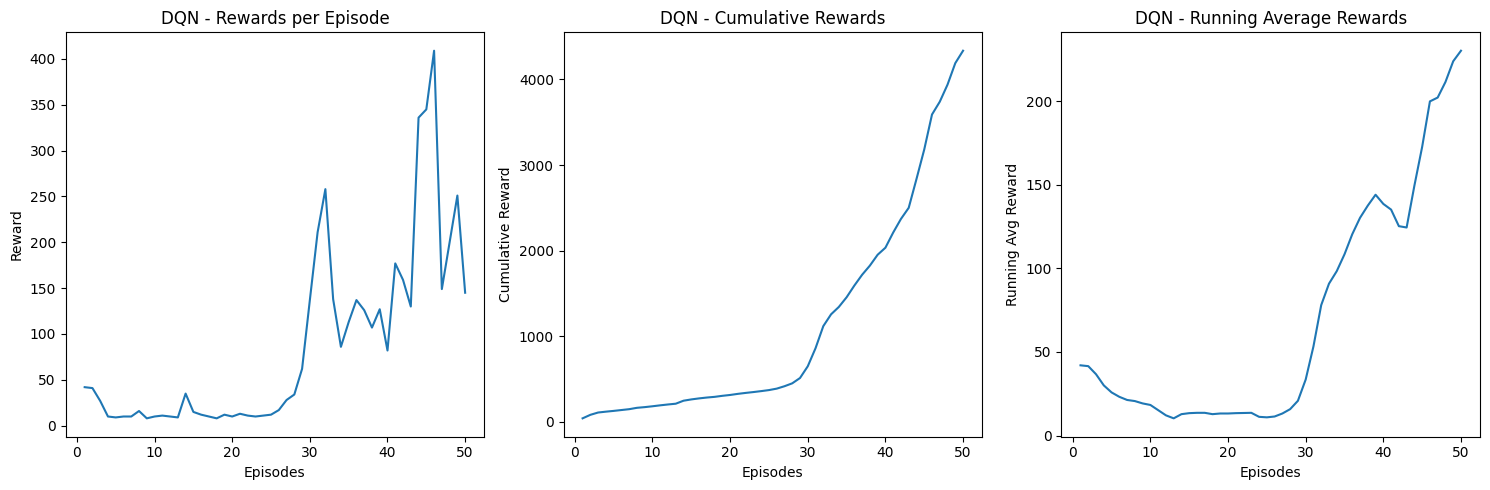

Training DDQN Agent...
Episode 1/50, Reward: 14.0, Cumulative Reward: 14.0, Running Avg: 14.0
Episode 2/50, Reward: 16.0, Cumulative Reward: 30.0, Running Avg: 15.0
Episode 3/50, Reward: 22.0, Cumulative Reward: 52.0, Running Avg: 17.333333333333332
Episode 4/50, Reward: 10.0, Cumulative Reward: 62.0, Running Avg: 15.5
Episode 5/50, Reward: 12.0, Cumulative Reward: 74.0, Running Avg: 14.8
Episode 6/50, Reward: 11.0, Cumulative Reward: 85.0, Running Avg: 14.166666666666666
Episode 7/50, Reward: 14.0, Cumulative Reward: 99.0, Running Avg: 14.142857142857142
Episode 8/50, Reward: 20.0, Cumulative Reward: 119.0, Running Avg: 14.875
Episode 9/50, Reward: 17.0, Cumulative Reward: 136.0, Running Avg: 15.11111111111111
Episode 10/50, Reward: 11.0, Cumulative Reward: 147.0, Running Avg: 14.7
Episode 11/50, Reward: 10.0, Cumulative Reward: 157.0, Running Avg: 14.3
Episode 12/50, Reward: 9.0, Cumulative Reward: 166.0, Running Avg: 13.6
Episode 13/50, Reward: 13.0, Cumulative Reward: 179.0, Runnin

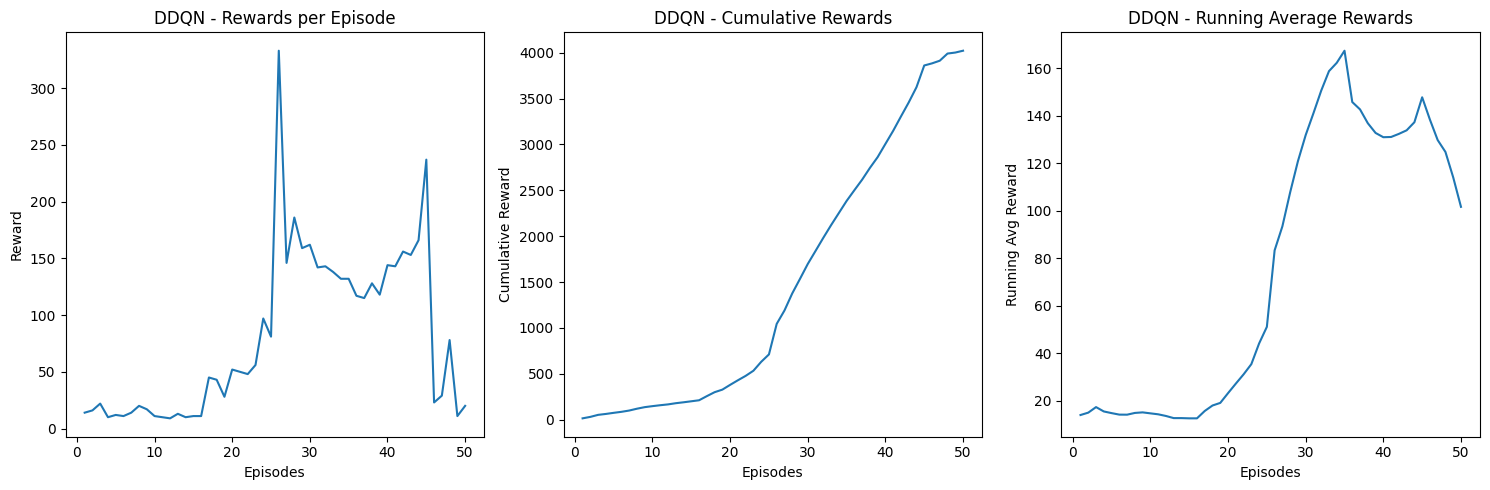

In [9]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import tensorflow as tf
from tensorflow import keras
import random

# Q-Learning Agent
class QLearningAgent:
    def __init__(self, state_size, action_size, alpha, gamma, epsilon, epsilon_decay):
        self.state_size = state_size
        self.action_size = action_size
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = 0.01
        self.q_table = np.zeros(self.state_size + (self.action_size,))
    
    def act(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.action_size - 1)
        return np.argmax(self.q_table[state])
    
    def learn(self, state, action, reward, next_state, done):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state + (best_next_action,)] * (not done)
        td_error = td_target - self.q_table[state + (action,)]
        self.q_table[state + (action,)] += self.alpha * td_error
        
        if done:
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

# DQN and DDQN base class
class DQNBaseAgent:
    def __init__(self, state_size, action_size, learning_rate, gamma, epsilon_decay):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = gamma
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = epsilon_decay
        self.learning_rate = learning_rate
        self.model = self._build_model()

    def _build_model(self):
        model = keras.Sequential([
            keras.layers.Dense(24, input_shape=(self.state_size,), activation='relu'),
            keras.layers.Dense(24, activation='relu'),
            keras.layers.Dense(self.action_size, activation='linear')
        ])
        model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        states = np.array([experience[0] for experience in minibatch]).reshape(batch_size, self.state_size)
        next_states = np.array([experience[3] for experience in minibatch]).reshape(batch_size, self.state_size)
        targets = self.model.predict(states, verbose=0)

        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state.reshape(1, self.state_size), verbose=0)[0])
            targets[i][action] = target

        self.model.fit(states, targets, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# DQN Agent
class DQNAgent(DQNBaseAgent):
    pass

# DDQN Agent
class DDQNAgent(DQNBaseAgent):
    def __init__(self, state_size, action_size, learning_rate, gamma, epsilon_decay):
        super().__init__(state_size, action_size, learning_rate, gamma, epsilon_decay)
        self.target_model = self._build_model()
        self.update_target_model()

    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        states = np.array([experience[0] for experience in minibatch]).reshape(batch_size, self.state_size)
        next_states = np.array([experience[3] for experience in minibatch]).reshape(batch_size, self.state_size)
        targets = self.model.predict(states, verbose=0)

        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            target = reward
            if not done:
                t = self.target_model.predict(next_state, verbose=0)
                a = np.argmax(self.model.predict(next_state, verbose=0)[0])
                target = reward + self.gamma * t[0][a]
            targets[i][action] = target

        self.model.fit(states, targets, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        self.update_target_model()

# Helper functions
def discretize_state(state, bins):
    return tuple(np.digitize(state[i], bins[i]) for i in range(len(state)))

def run_episode(env, agent, bins=None, batch_size=32, training=True):
    state = env.reset()[0]
    if bins:
        state = discretize_state(state, bins)
    else:
        state = np.reshape(state, [1, agent.state_size])
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, truncated, _ = env.step(action)
        done = done or truncated
        total_reward += reward
        
        if bins:
            next_state_discrete = discretize_state(next_state, bins)
            agent.learn(state, action, reward, next_state_discrete, done)
            state = next_state_discrete
        else:
            next_state = np.reshape(next_state, [1, agent.state_size])
            if training:
                agent.remember(state, action, reward, next_state, done)
                if len(agent.memory) > batch_size:
                    agent.replay(batch_size)
            state = next_state

    return total_reward

def train_agent(env, agent, episodes=50, bins=None, batch_size=32):
    rewards = []
    cumulative_rewards = []
    running_avg_rewards = []
    cumulative_reward = 0
    
    for episode in range(episodes):
        reward = run_episode(env, agent, bins, batch_size)
        rewards.append(reward)
        cumulative_reward += reward
        cumulative_rewards.append(cumulative_reward)
        running_avg_rewards.append(np.mean(rewards[-10:]))  # Running average of last 10 episodes
        
        print(f"Episode {episode+1}/{episodes}, Reward: {reward}, Cumulative Reward: {cumulative_reward}, Running Avg: {running_avg_rewards[-1]}")
    
    return rewards, cumulative_rewards, running_avg_rewards

def plot_metrics(algorithm_name, rewards, cumulative_rewards, running_avg_rewards):
    episodes = range(1, len(rewards) + 1)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(episodes, rewards)
    plt.title(f'{algorithm_name} - Rewards per Episode')
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    
    plt.subplot(1, 3, 2)
    plt.plot(episodes, cumulative_rewards)
    plt.title(f'{algorithm_name} - Cumulative Rewards')
    plt.xlabel('Episodes')
    plt.ylabel('Cumulative Reward')
    
    plt.subplot(1, 3, 3)
    plt.plot(episodes, running_avg_rewards)
    plt.title(f'{algorithm_name} - Running Average Rewards')
    plt.xlabel('Episodes')
    plt.ylabel('Running Avg Reward')
    
    plt.tight_layout()
    plt.show()

# Main execution
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Q-Learning
print("Training Q-Learning Agent...")
q_learning_bins = [
    np.linspace(-4.8, 4.8, 10),
    np.linspace(-4, 4, 10),
    np.linspace(-0.418, 0.418, 10),
    np.linspace(-4, 4, 10)
]
q_learning_agent = QLearningAgent(state_size=(10, 10, 10, 10), action_size=action_size, alpha=0.3, gamma=0.99, epsilon=1.0, epsilon_decay=0.995)
q_learning_rewards, q_learning_cum_rewards, q_learning_running_avg = train_agent(env, q_learning_agent, episodes=50, bins=q_learning_bins)
plot_metrics("Q-Learning", q_learning_rewards, q_learning_cum_rewards, q_learning_running_avg)

# DQN
print("Training DQN Agent...")
dqn_agent = DQNAgent(state_size=state_size, action_size=action_size, learning_rate=0.00198, gamma=0.9364, epsilon_decay=0.995)
dqn_rewards, dqn_cum_rewards, dqn_running_avg = train_agent(env, dqn_agent, episodes=50)
plot_metrics("DQN", dqn_rewards, dqn_cum_rewards, dqn_running_avg)

# DDQN
print("Training DDQN Agent...")
ddqn_agent = DDQNAgent(state_size=state_size, action_size=action_size, learning_rate=0.00979, gamma=0.9406, epsilon_decay=0.992)
ddqn_rewards, ddqn_cum_rewards, ddqn_running_avg = train_agent(env, ddqn_agent, episodes=50)
plot_metrics("DDQN", ddqn_rewards, ddqn_cum_rewards, ddqn_running_avg)


***`Conclusion & Future Work:`***

The results demonstrate that DQN outperforms both Q-Learning and DDQN in solving the CartPole problem, especially after hyperparameter tuning. The use of a deep neural network allows DQN to handle the continuous state space more effectively than Q-Learning. Although DDQN provides theoretical improvements by reducing Q-value overestimation, in this particular case, it did not surpass the performance of DQN.

***`Future Work:`***

Future research could explore the impact of different neural network architectures, such as deeper networks or recurrent networks, on the performance of DQN and DDQN. Additionally, more extensive hyperparameter tuning, including adaptive exploration strategies, could further optimize the performance of these algorithms. Exploring other reinforcement learning techniques, such as Proximal Policy Optimization (PPO) or Soft Actor-Critic (SAC), could also provide valuable insights into more complex control problems.
